Last 5 rows of Tesla revenue data:
         Date      Revenue
0  2024-12-31  97690000000
1  2023-12-31  96773000000
2  2022-12-31  81462000000
3  2021-12-31  53823000000
4  2020-12-31  31536000000
Screenshot saved to: C:\Users\Fafcom Technology\Pictures\tesla_revenue_tail_output.png


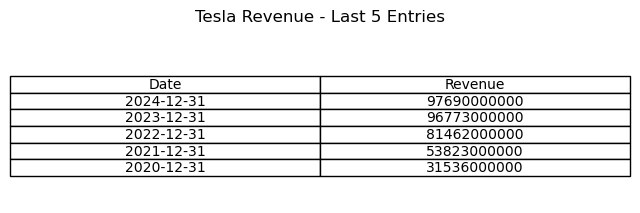

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: API Request for Tesla Income Statement (Annual)
api_key = 'CnuMLDWfmc3QszQvNtTbmGiqiLdtj4l4'  
url = f'https://financialmodelingprep.com/api/v3/income-statement/TSLA?period=annual&limit=100&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Step 2: Check if the response is valid and contains data
if isinstance(data, list) and len(data) > 0 and 'revenue' in data[0]:
    # Step 3: Extract only the date and revenue fields
    tesla_revenue = pd.DataFrame([ {'Date': entry['date'], 'Revenue': entry['revenue']}for entry in data if 'date' in entry and 'revenue' in entry])
    
    # Step 4: Clean the data
    tesla_revenue.dropna(inplace=True)
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
    tesla_revenue.dropna(inplace=True)
    
    # Step 5: Display the last 5 rows
    print("Last 5 rows of Tesla revenue data:")
    print(tesla_revenue.tail())

    # Step 6: Save screenshot of table as image
    plt.figure(figsize=(8, 2))
    plt.table(cellText=tesla_revenue.tail().values,
              colLabels=tesla_revenue.columns,
              cellLoc='center', loc='center')
    plt.axis('off')
    plt.title("Tesla Revenue - Last 5 Entries", pad=20)
    
    # Update this path if needed
    plt.savefig(r"C:\Users\Fafcom Technology\Pictures\tesla_revenue_tail_output.png", bbox_inches='tight')
    print("Screenshot saved to: C:\\Users\\Fafcom Technology\\Pictures\\tesla_revenue_tail_output.png")

else:
    print("Error: Could not retrieve revenue data. Check your API key or plan status.")
